<a href="https://colab.research.google.com/github/bogard75/bogard75.github.io/blob/master/ecos_api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from bs4 import BeautifulSoup
import requests
import datetime as dt
import numpy as np
import pandas as pd

##1 한은 ECOS Open API

In [0]:
#url = 'http://ecos.bok.or.kr/api/StatisticTableList/HSR8HN3LD76UPXWLXEDX/xml/kr/1/10/'
#url = 'http://ecos.bok.or.kr/api/StatisticMeta/HSR8HN3LD76UPXWLXEDX/xml/kr/1/10/경제심리/'
# 통계코드검색 (http://ecos.bok.or.kr/jsp/openapi/OpenApiController.jsp?t=guideStatCd&menuGroup=MENU000004&menuCode=MENU000024)
# 3. 예금/대출금/기타금융
#    3.5 지역별 여수신
#        3.5.1 예금은행 수신 및 여신
#              3.5.1.1 예금은행 지역별예금(말잔)[088Y002]
#                      원화예금[100000]
#                      요구불예금[110000]
#                      저축성예금[120000]
#              3.5.1.2 예금은행 지역별대출금(말잔)[088Y003]
#                      원화대출금[200000]
#                      시설자금[20Y000]
#                      운전자금[20X000]



api_key = 'HSR8HN3LD76UPXWLXEDX'
url = 'http://ecos.bok.or.kr/api/StatisticSearch/{0}/xml/kr/1/100'.format(api_key) 

#ecos_request_data(url, '088Y002/MM/201101/202001/100000/X00')
def ecos_request_data(url, item):
    ret = requests.get('/'.join([url, item]))
    xml = BeautifulSoup(ret.text, 'xml')
    lst = [[r.find('TIME').contents[0], r.find('DATA_VALUE').contents[0]] for r in xml.find_all('row')]

    time_format = item.split('/')[1]
    data_value = item.split('/')[-1]

    df = pd.DataFrame(lst, columns=[time_format, data_value])

    if time_format=='YY':
        df[time_format] = pd.to_datetime(df[time_format], format='%Y', errors='coerce')
    elif time_format=='MM':
        df[time_format] = pd.to_datetime(df[time_format], format='%Y%m', errors='coerce')
    else:
        df[time_format] = pd.to_datetime(df[time_format], format='%Y%m', errors='coerce')

    df[data_value] = pd.to_numeric(df[data_value], errors='coerce')
    df = df.set_index(time_format)
    return df



In [0]:
dep_X00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/X00')

In [0]:
ret = requests.get('http://ecos.bok.or.kr/api/StatisticTableList/HSR8HN3LD76UPXWLXEDX/xml/kr/1/10/')
xml = BeautifulSoup(ret.text, 'xml')
xml


##2 예금은행지역별예금말잔 현황

In [0]:
dep_X00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/X00')  # 예금은행지역별예금말잔/원화예금/전국
dep_A00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/A00')  # 예금은행지역별예금말잔/원화예금/서울
dep_D00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/D00')  # 예금은행지역별예금말잔/원화예금/인천
dep_L00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/L00')  # 예금은행지역별예금말잔/원화예금/경기
dep_B00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/B00')  # 예금은행지역별예금말잔/원화예금/부산
dep_G00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/G00')  # 예금은행지역별예금말잔/원화예금/울산
dep_T00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/T00')  # 예금은행지역별예금말잔/원화예금/경남
dep_C00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/C00')  # 예금은행지역별예금말잔/원화예금/대구
dep_S00 = ecos_request_data(url, '088Y002/MM/201101/202001/100000/S00')  # 예금은행지역별예금말잔/원화예금/경북

deposit = pd.concat([dep_A00,dep_D00,dep_L00,dep_B00,dep_G00,dep_T00,dep_C00,dep_S00],axis=1)

In [0]:
#deposit['수도권']=deposit['A00']+deposit['D00']+deposit['L00']
#deposit['부울경']=deposit['B00']+deposit['G00']+deposit['T00']
#deposit['대경권']=deposit['C00']+deposit['S00']

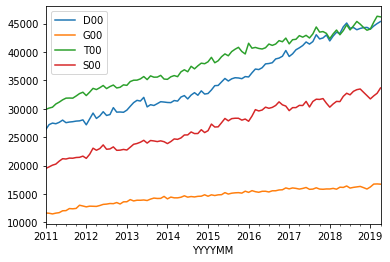

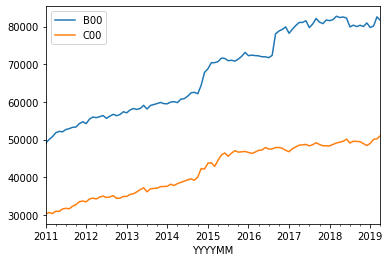

In [227]:
deposit.drop(columns=['A00','L00','B00','C00']).plot()
deposit[['B00','C00']].plot()

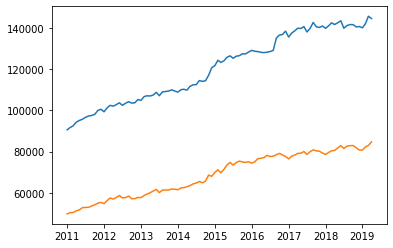

In [179]:
import matplotlib.pyplot as plt

#plt.plot(예금은행지역별예금말잔_원화예금_수도권)
plt.plot(예금은행지역별예금말잔_원화예금_부울경)
plt.plot(예금은행지역별예금말잔_원화예금_대경권)

##3 예금은행지역별대출금 현황 (088Y003)


In [0]:
ln_X00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/X00')  # 예금은행지역별예금말잔/원화예금/전국
ln_A00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/A00')  # 예금은행지역별예금말잔/원화예금/서울
ln_D00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/D00')  # 예금은행지역별예금말잔/원화예금/인천
ln_L00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/L00')  # 예금은행지역별예금말잔/원화예금/경기
ln_B00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/B00')  # 예금은행지역별예금말잔/원화예금/부산
ln_G00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/G00')  # 예금은행지역별예금말잔/원화예금/울산
ln_T00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/T00')  # 예금은행지역별예금말잔/원화예금/경남
ln_C00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/C00')  # 예금은행지역별예금말잔/원화예금/대구
ln_S00 = ecos_request_data(url, '088Y003/MM/201101/202001/200000/S00')  # 예금은행지역별예금말잔/원화예금/경북

loan = pd.concat([ln_A00,ln_D00,ln_L00,ln_B00,ln_G00,ln_T00,ln_C00,ln_S00],axis=1)

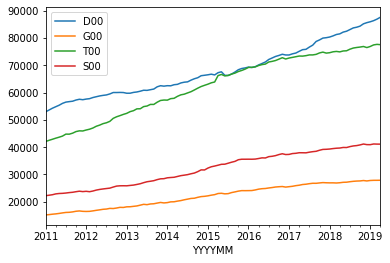

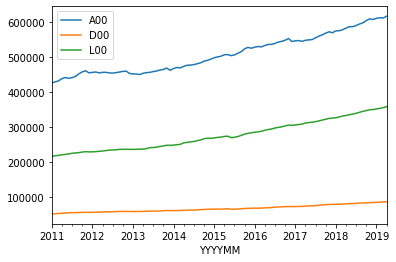

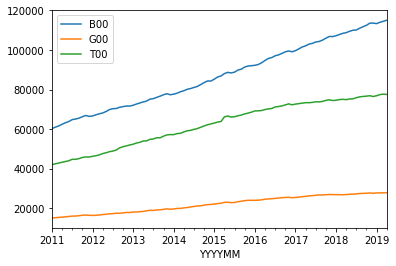

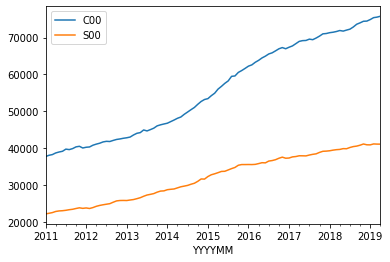

In [233]:
loan.drop(columns=['A00','L00','B00','C00']).plot()
loan[['A00','D00','L00']].plot()
loan[['B00','G00','T00']].plot()
loan[['C00','S00']].plot()


###기업대출금(1A0000), 중소기업대출(X120000)


In [0]:
ln_X00 = ecos_request_data(url, '088Y004/MM/201101/202001/1A0000/X00')  # 예금은행기업대출금말잔/기업대출금/전국
ln_A00 = ecos_request_data(url, '088Y004/MM/201101/202001/1A0000/A00')  # 예금은행기업대출금말잔/기업대출금/서울
ln_D00 = ecos_request_data(url, '088Y004/MM/201101/202001/1A0000/D00')  # 예금은행기업대출금말잔/기업대출금/인천
ln_L00 = ecos_request_data(url, '088Y004/MM/201101/202001/1A0000/L00')  # 예금은행기업대출금말잔/기업대출금/경기
ln_B00 = ecos_request_data(url, '088Y004/MM/201101/202001/1A0000/B00')  # 예금은행기업대출금말잔/기업대출금/부산
ln_G00 = ecos_request_data(url, '088Y004/MM/201101/202001/1A0000/G00')  # 예금은행기업대출금말잔/기업대출금/울산
ln_T00 = ecos_request_data(url, '088Y004/MM/201101/202001/1A0000/T00')  # 예금은행기업대출금말잔/기업대출금/경남
ln_C00 = ecos_request_data(url, '088Y004/MM/201101/202001/1A0000/C00')  # 예금은행기업대출금말잔/기업대출금/대구
ln_S00 = ecos_request_data(url, '088Y004/MM/201101/202001/1A0000/S00')  # 예금은행기업대출금말잔/기업대출금/경북

loan = pd.concat([ln_A00,ln_D00,ln_L00,ln_B00,ln_G00,ln_T00,ln_C00,ln_S00],axis=1)

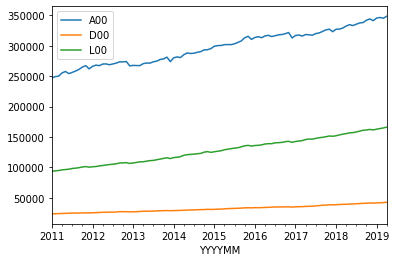

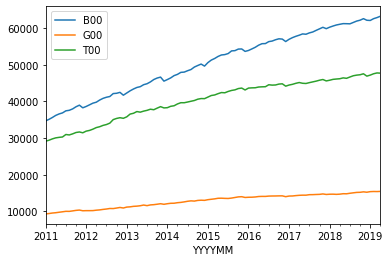

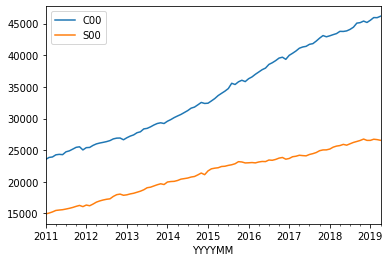

In [239]:
loan[['A00','D00','L00']].plot()
loan[['B00','G00','T00']].plot()
loan[['C00','S00']].plot()

##12 기업경영분석
###12.1 기업경영분석지표
####12.1.1 기업경영분석지표(2009~,전수조사) [027Y431]
- 전산업ZZZ00, 제조업C
- 부채비율[707][%]
- 자기자본비율[701][%]
- 차입금의존도[710][%]
- 유동비율[702][%]
- 비유동비율[7051][%]
- 매출액영업이익률[611][%]
- 매출액세전순이익률[6091][%]
- 이자보상비율[627][%] ★
- 금융비용부담률[625][%]
- 차입금평균이자율[623][%]
- 인건비대매출액[616][%]
- 인건비대영업총비용[6161][%]
- 매출액증가율[506][%]
- 유형자산증가율[502][%]
- 총자산증가율[501][%]


In [326]:
#ecos_request_data(url, '027Y431/YY/2000/2020/ZZZ00/701')  # 기업경영분석지표/전산업/종합/총자산증가율
fs_code=['707','701','710','702','7051','611','6091','627','625','623','616','6161'] #,'506','502','501']
fsa = pd.concat([ecos_request_data(url, '027Y431/YY/2000/2020/ZZZ00/{0}'.format(c)) for c in fs_code], axis=1)

707
(10, 1)
701
(10, 1)
710
(10, 1)
702
(10, 1)
7051
(10, 1)
611
(10, 1)
6091
(10, 1)
627
(10, 1)
625
(10, 1)
623
(10, 1)
616
(10, 1)
6161
(10, 1)


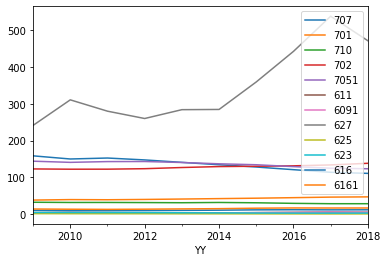

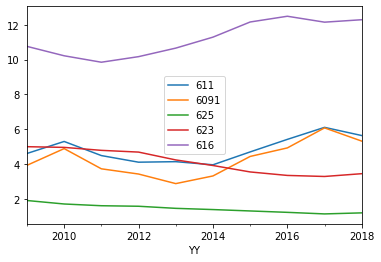

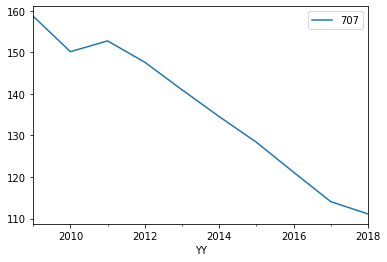

In [350]:
#fsa.drop(columns=['627']).plot()
#url
fsa.plot()
top_7 = fsa.loc['2018-01-01'].sort_values(ascending=False)[:7].index
fsa.drop(columns=top_7).plot()
fsa[['707']].plot()